In [ ]:
#EDA
#profile of data
#statistical
#graphical


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('BIKE DETAILS.csv')

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


Q1.What is the range of selling prices in the dataset.

In [ ]:
# Check the range (minimum and maximum) of the selling_price column
selling_price_range = df['selling_price'].min(), df['selling_price'].max()
selling_price_range


(5000, 760000)

Q 2.What is the median selling price for bikes in the dataset?

In [ ]:
# Calculate the median selling price
median_selling_price = df['selling_price'].median()
median_selling_price


45000.0

Q 3.What is the most common seller type ?

In [ ]:
# Find the most common seller type
most_common_seller_type = df['seller_type'].mode()[0]
most_common_seller_type


'Individual'

Q 4.How many bikes have driven more than 50,000 kilometers ?

In [ ]:
# Count how many bikes have driven more than 50,000 kilometers
bikes_over_50000_km = df[df['km_driven'] > 50000].shape[0]
bikes_over_50000_km


170

Q 5.What is the average km_driven value for each owenership type ?

In [ ]:
# Group by ownership type and calculate the average km_driven
average_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(average_km_by_owner)


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


Q 6.What proportion of bikes are from the year 2015 or older?

In [ ]:
# Count bikes from 2015 or earlier
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]

# Total number of bikes
total_bikes = df.shape[0]

# Calculate the proportion
proportion = bikes_2015_or_older / total_bikes
print(proportion)


0.5664467483506126


Q 7.What is the trend of missing values across the dataset?

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine into a single summary table
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print(missing_summary)


                   Missing Values  Percentage (%)
name                            0        0.000000
selling_price                   0        0.000000
year                            0        0.000000
seller_type                     0        0.000000
owner                           0        0.000000
km_driven                       0        0.000000
ex_showroom_price             435       40.999057


Q 8.What is the highest ex_showroom_price recorded, and for which bike?


In [ ]:
# Find the row with the highest ex_showroom_price
highest_price_row = df.loc[df['ex_showroom_price'].idxmax()]

# Display the bike name and price
bike_name = highest_price_row['name']
highest_price = highest_price_row['ex_showroom_price']

print(f"Highest ex-showroom price is ₹{highest_price} for the bike: {bike_name}")


Highest ex-showroom price is ₹1278000.0 for the bike: Harley-Davidson Street Bob


Q 9.What is the total number of bikes listed by each seller type ?


In [ ]:
df.groupby('seller_type').size()


,0
seller_type,
Dealer,6
Individual,1055


In [ ]:
df.groupby('seller_type')['name'].count()


,name
seller_type,
Dealer,6
Individual,1055


Q 10.What is the relationship between selling_price and km_driven for first-owner bikes?


In [ ]:
first_owner_bikes = df[df['owner'] == 'First Owner']


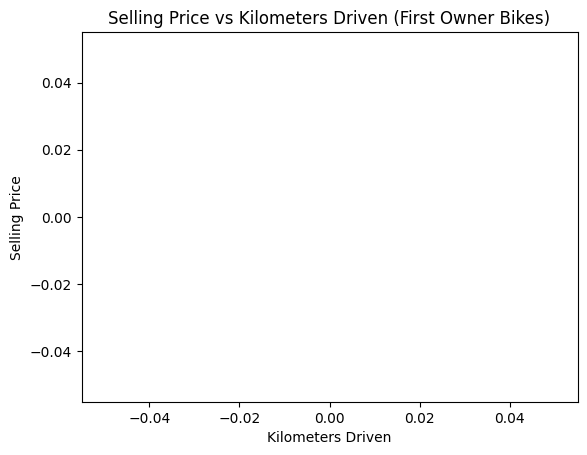

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(first_owner_bikes['km_driven'], first_owner_bikes['selling_price'])
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Selling Price vs Kilometers Driven (First Owner Bikes)')
plt.show()



In [ ]:
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(f"Correlation: {correlation}")


Correlation: nan


Q 11. Identify and remove outliers in the km_driven column using the IQR method.


In [ ]:
import pandas as pd

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]


In [ ]:
print("Original dataset size:", len(df))
print("After removing outliers:", len(df_no_outliers))
print("Outliers removed:", len(df) - len(df_no_outliers))


Original dataset size: 1061
After removing outliers: 1022
Outliers removed: 39


Q 12.Perform a bivariate analysis to visualize the relationship between year and selling price.


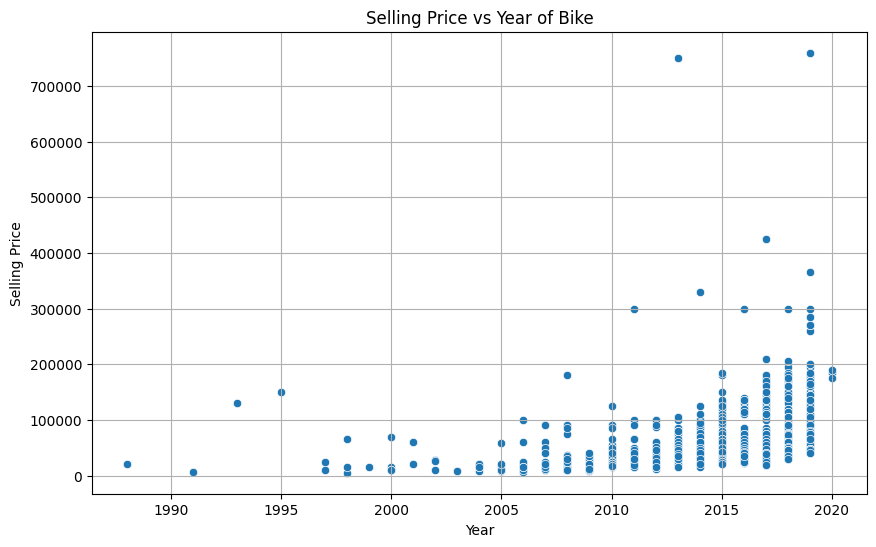

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs Year of Bike')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


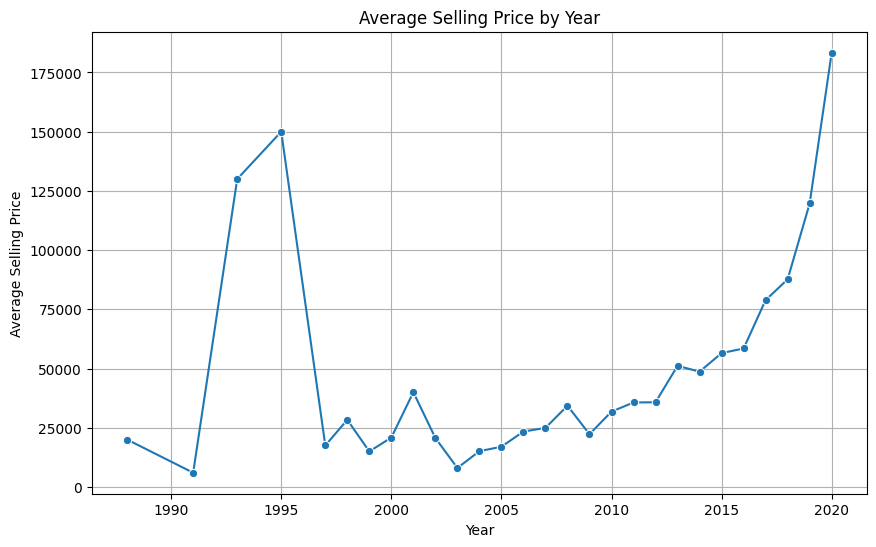

In [ ]:
avg_price_per_year = df.groupby('year')['selling_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='selling_price', data=avg_price_per_year, marker='o')
plt.title('Average Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()


Q 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?


In [ ]:
import pandas as pd
from datetime import datetime

# Step 1: Calculate age of each bike
current_year = datetime.now().year
df['age'] = current_year - df['year']

# Step 2: Group by age and calculate average selling price
avg_price_by_age = df.groupby('age')['selling_price'].mean().reset_index()

# Step 3: Display the result
print(avg_price_by_age)


    age  selling_price
0     5  183333.333333
1     6  119689.511628
2     7   87660.374046
3     8   78894.736842
4     9   58469.018692
5    10   56500.000000
6    11   48668.131868
7    12   51136.986301
8    13   35748.400000
9    14   35655.721311
10   15   31793.333333
11   16   22267.857143
12   17   34289.285714
13   18   24927.586207
14   19   23380.000000
15   20   16978.571429
16   21   15100.000000
17   22    8000.000000
18   23   20666.666667
19   24   40000.000000
20   25   20833.333333
21   26   15000.000000
22   27   28333.333333
23   28   17500.000000
24   30  150000.000000
25   32  130000.000000
26   34    6000.000000
27   37   20000.000000


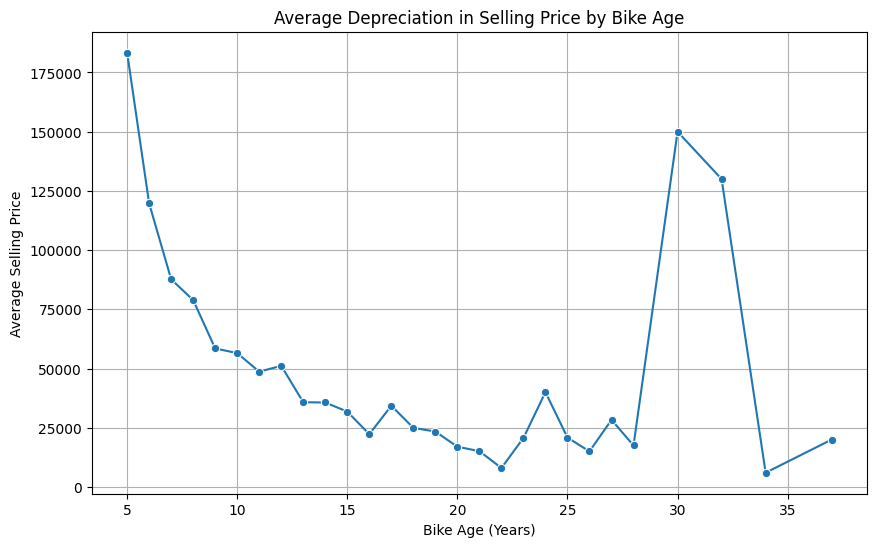

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='selling_price', data=avg_price_by_age, marker='o')
plt.title('Average Depreciation in Selling Price by Bike Age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()


Q 14.Which bike names are priced significantly above the average price for their manufacturing year?

In [ ]:
# Step 1: Calculate average selling price per year
avg_price_per_year = df.groupby('year')['selling_price'].mean().reset_index()
avg_price_per_year.rename(columns={'selling_price': 'avg_year_price'}, inplace=True)

# Step 2: Merge with original dataframe to get average price for each bike's year
df_merged = pd.merge(df, avg_price_per_year, on='year')

# Step 3: Define "significantly above" — say, 1.5 times the average price
threshold = 1.5
df_above_avg = df_merged[df_merged['selling_price'] > threshold * df_merged['avg_year_price']]

# Step 4: Get unique bike names that meet the criteria
bike_names_above_avg = df_above_avg['name'].unique()

# Display result
print("Bikes priced significantly above average for their year:")
print(bike_names_above_avg)


Bikes priced significantly above average for their year:
['Royal Enfield Classic Gunmetal Grey'
 'Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3' 'Jawa Standard'
 'Royal Enfield Thunderbird 350' 'Honda CBR-250R' 'Bajaj Dominar 400'
 'KTM 390 Duke' 'Royal Enfield Electra 5 S' 'Royal Enfield Bullet 350'
 'Royal Enfield Electra 4 S' 'Mahindra Mojo XT300'
 'Hero Honda Karizma ZMR [2010]' 'Royal Enfield Thunderbird 350X'
 'Royal Enfield Classic Desert Storm' 'Yamaha FZ25' 'UM Renegade Commando'
 'Royal Enfield Classic 350' 'Royal Enfield Continental GT 650'
 'Harley-Davidson Street Bob' 'KTM 390 Duke ABS [2013-2016]'
 'Royal Enfield Classic 500' 'KTM RC 390' 'Bajaj Pulsar 150' 'KTM RC 200'
 'Honda CB Unicorn 150' 'Royal Enfield Bullet 500'
 'Bajaj Dominar 400 [2018]' 'Royal Enfield Interceptor 650'
 'Royal Enfield Machismo' 'KTM 250 Duke' 'Kawasaki Ninja 650 [2018-2019]'
 'Kawasaki Ninja 250R' 'Suzuki GSX S750' 'Yamaha Rx' 'Yamaha Fazer Dlx'
 'Harley-Davidson Street 750' 'TVS Apache R

Q 15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.

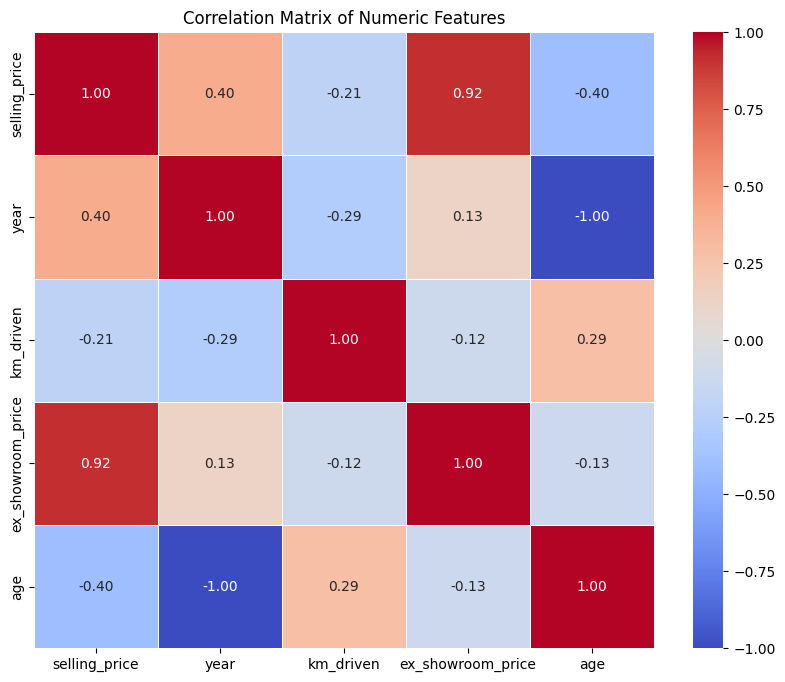

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [ ]:
#EDA
#profile of data
#statistical
#graphical


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('Car Sale.csv')

In [ ]:
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


Q 1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?

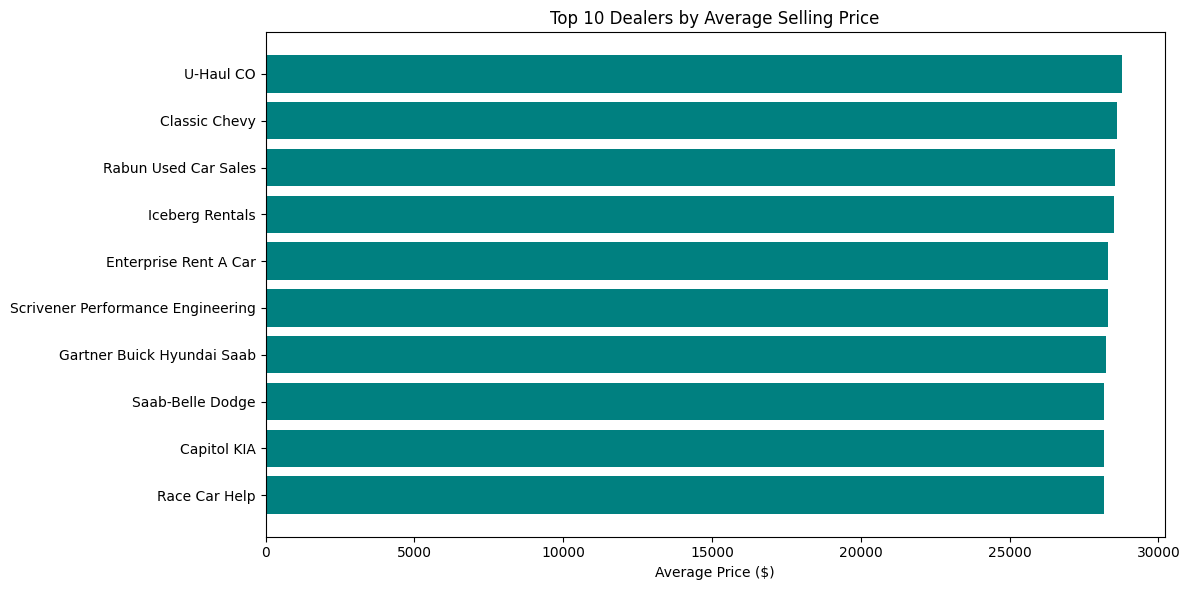

,Dealer_Name,Average_Price
0,U-Haul CO,28769.919006
1,Classic Chevy,28602.014446
2,Rabun Used Car Sales,28527.536177
3,Iceberg Rentals,28522.958533
4,Enterprise Rent A Car,28312.580800
5,Scrivener Performance Engineering,28297.371589
6,Gartner Buick Hyundai Saab,28247.621019
7,Saab-Belle Dodge,28190.139888
8,Capitol KIA,28189.703822
9,Race Car Help,28163.372706


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Car Sale.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Calculate average selling price for each dealer
avg_price_per_dealer = df.groupby("Dealer_Name")["Price ($)"].mean().sort_values(ascending=False)
avg_price_per_dealer_df = avg_price_per_dealer.reset_index()
avg_price_per_dealer_df.columns = ["Dealer_Name", "Average_Price"]

# Plot the top 10 dealers by average price
plt.figure(figsize=(12, 6))
top_10 = avg_price_per_dealer_df.head(10)
plt.barh(top_10["Dealer_Name"], top_10["Average_Price"], color='teal')
plt.xlabel("Average Price ($)")
plt.title("Top 10 Dealers by Average Selling Price")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Return the full average price DataFrame for reference
avg_price_per_dealer_df.head(15)  # Show top 15 for a bit more context


Q 2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?


In [ ]:
import pandas as pd

# Load your CSV
df = pd.read_csv("Car Sale.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Group by Company and calculate standard deviation of price
price_variation = df.groupby("Company")["Price ($)"].std().sort_values(ascending=False)

# Convert to DataFrame for easier display
variation_df = price_variation.reset_index()
variation_df.columns = ["Company", "Price_StdDev"]

# Show top 10 companies with highest price variation
print(variation_df.head(10))


    Company  Price_StdDev
0   Lincoln  19658.050211
1      Saab  19653.740089
2  Cadillac  19517.120220
3  Plymouth  19065.997338
4     Lexus  17852.923492
5     Buick  17142.232626
6   Mercury  16445.172195
7    Nissan  16214.264017
8    Saturn  15990.223671
9      Ford  15849.090227


Q 3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

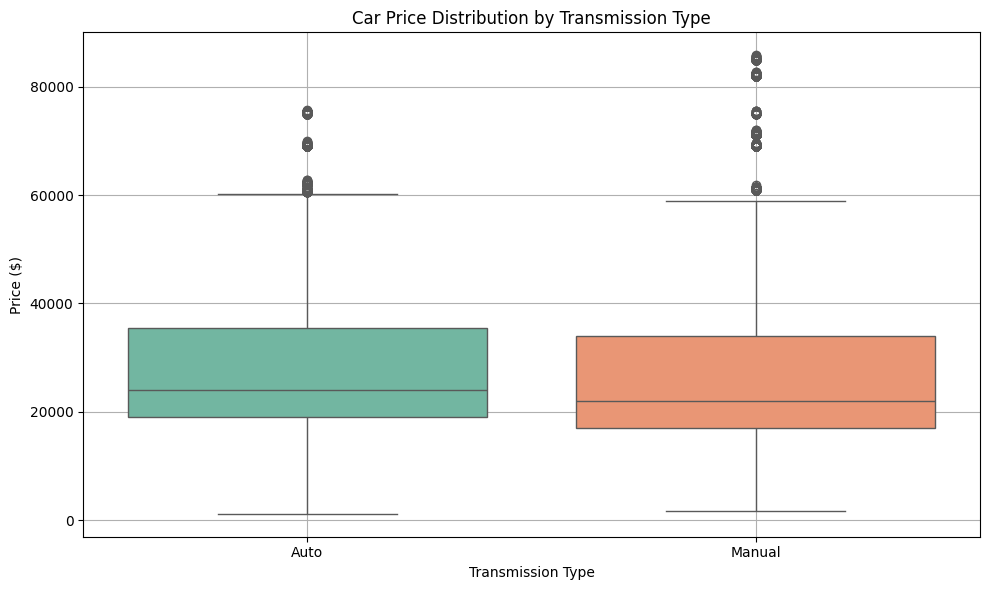

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()

# Optional: drop any missing or invalid values just in case
df = df.dropna(subset=["Price ($)", "Transmission"])

# Boxplot to show distribution and IQR for each transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Transmission", y="Price ($)", palette="Set2")

plt.title("Car Price Distribution by Transmission Type")
plt.ylabel("Price ($)")
plt.xlabel("Transmission Type")
plt.grid(True)
plt.tight_layout()
plt.show()


Q 4. What is the distribution of car prices across different regions?




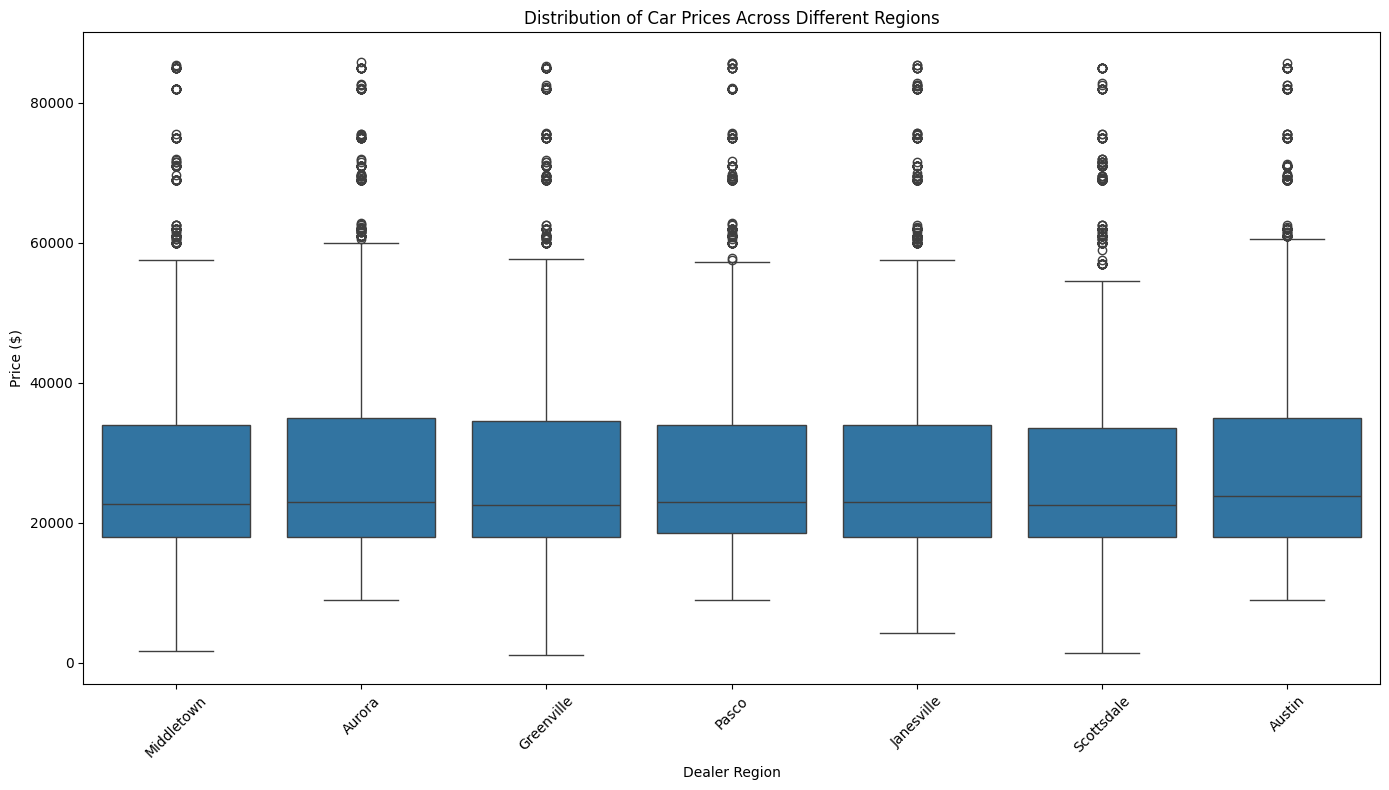

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot aesthetics
plt.figure(figsize=(14, 8))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.tight_layout()

plt.show()


Q 5.What is the distribution of cars based on body styles?

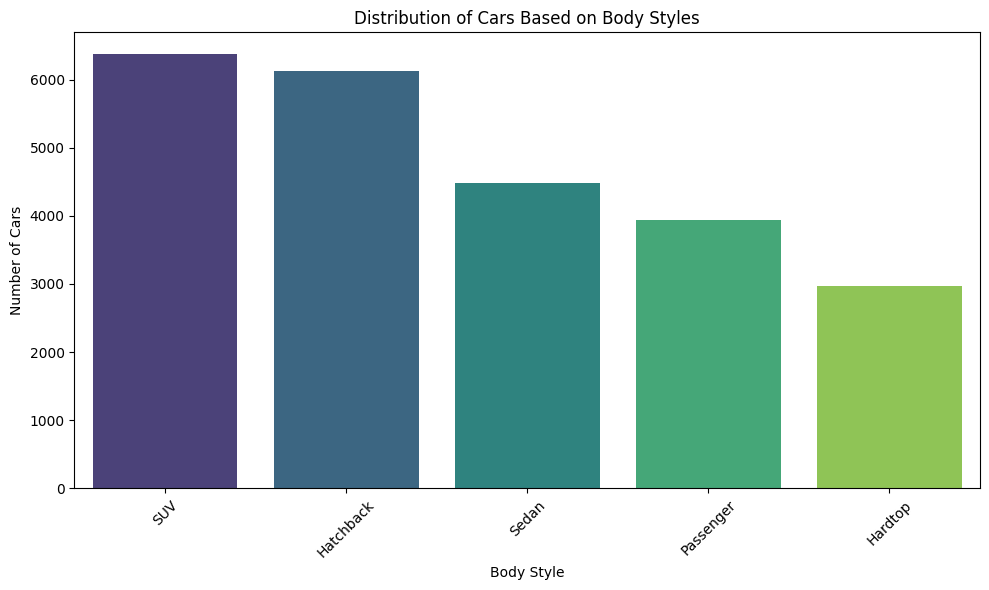

In [ ]:
# Count the number of cars per body style
body_style_counts = df['Body Style'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette="viridis")
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Q 6.How does the average selling price of cars vary by customer gender and annual income?

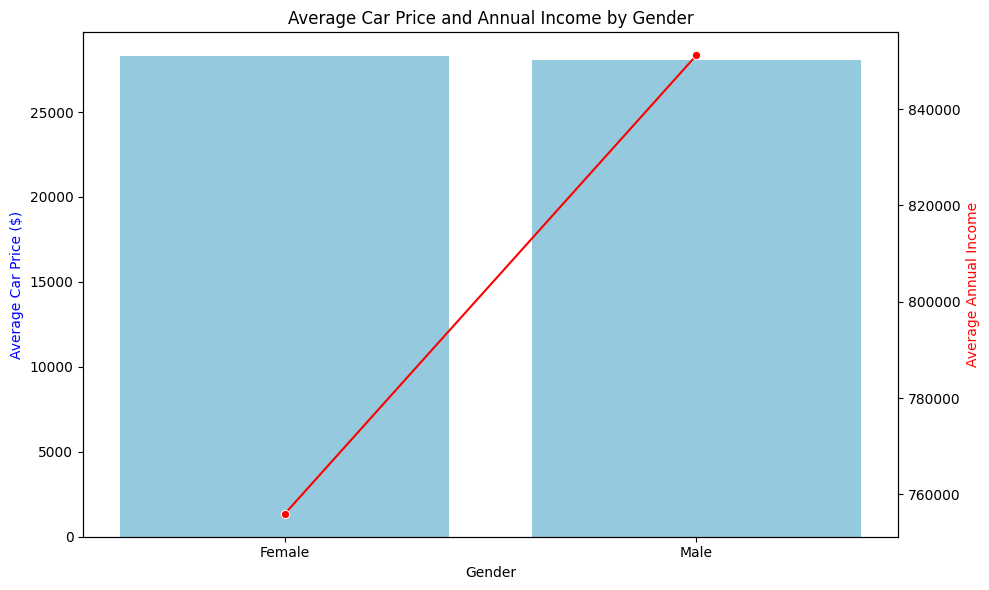

,Gender,Price ($),Annual Income
0,Female,28277.265270,755973.021339
1,Male,28039.429407,851184.044207


In [ ]:
# First, group by Gender and calculate the average price and income
avg_price_income_by_gender = df.groupby('Gender')[['Price ($)', 'Annual Income']].mean().reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for average price
sns.barplot(x='Gender', y='Price ($)', data=avg_price_income_by_gender, ax=ax1, color='skyblue')
ax1.set_ylabel('Average Car Price ($)', color='blue')
ax1.set_title('Average Car Price and Annual Income by Gender')

# Create a second y-axis for average income
ax2 = ax1.twinx()
sns.lineplot(x='Gender', y='Annual Income', data=avg_price_income_by_gender, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Annual Income', color='red')

plt.tight_layout()
plt.show()

# Show the data for context
avg_price_income_by_gender


<Figure size 1200x600 with 0 Axes>

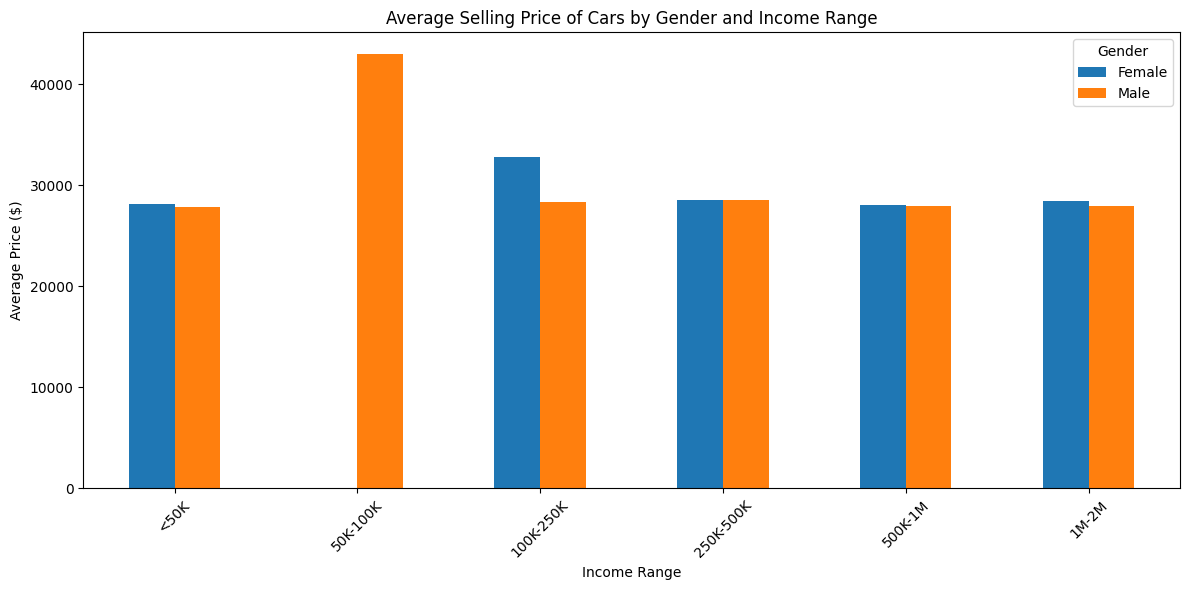

In [ ]:
# Bin annual income into ranges for better comparison
income_bins = [0, 50000, 100000, 250000, 500000, 1000000, 2000000]
income_labels = ['<50K', '50K-100K', '100K-250K', '250K-500K', '500K-1M', '1M-2M']
df['Income Range'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)

# Group by Gender and Income Range to calculate average price
avg_price_by_gender_income = df.groupby(['Gender', 'Income Range'])['Price ($)'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))
avg_price_by_gender_income.T.plot(kind='bar', figsize=(12, 6))
plt.title('Average Selling Price of Cars by Gender and Income Range')
plt.xlabel('Income Range')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

plt.show()


Q 7.What is the distribution of car prices by region, and how does the number of cars sold vary by region ?

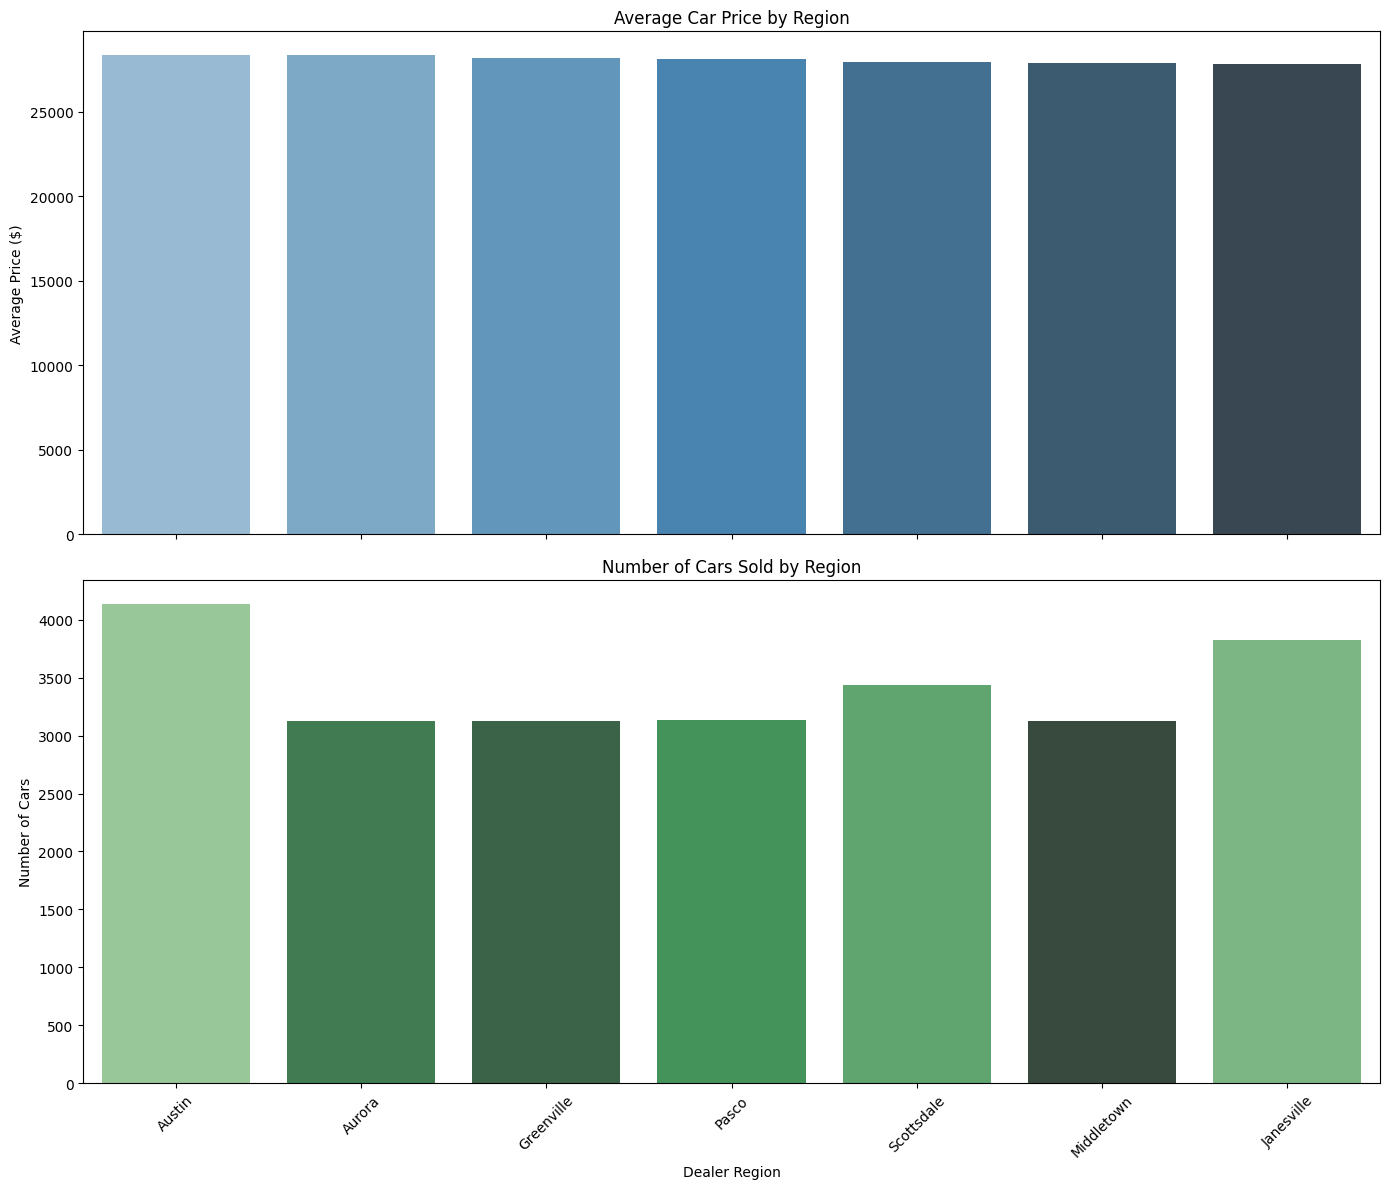

In [ ]:
# Calculate average price by region
avg_price_by_region = df.groupby('Dealer_Region')['Price ($)'].mean().sort_values(ascending=False)

# Calculate car count by region
car_count_by_region = df['Dealer_Region'].value_counts()

# Plotting both as subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Average price plot
sns.barplot(x=avg_price_by_region.index, y=avg_price_by_region.values, ax=ax1, palette='Blues_d')
ax1.set_title('Average Car Price by Region')
ax1.set_ylabel('Average Price ($)')
ax1.tick_params(axis='x', rotation=45)

# Car count plot
sns.barplot(x=car_count_by_region.index, y=car_count_by_region.values, ax=ax2, palette='Greens_d')
ax2.set_title('Number of Cars Sold by Region')
ax2.set_ylabel('Number of Cars')
ax2.set_xlabel('Dealer Region')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Q 8.How does the average car price differ between cars with different engine sizes?


In [ ]:
# Let's examine the unique values in the Engine column to understand the data
df['Engine'].unique()


array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

Q 9.How do car prices vary based on the customer's annual income bracket?

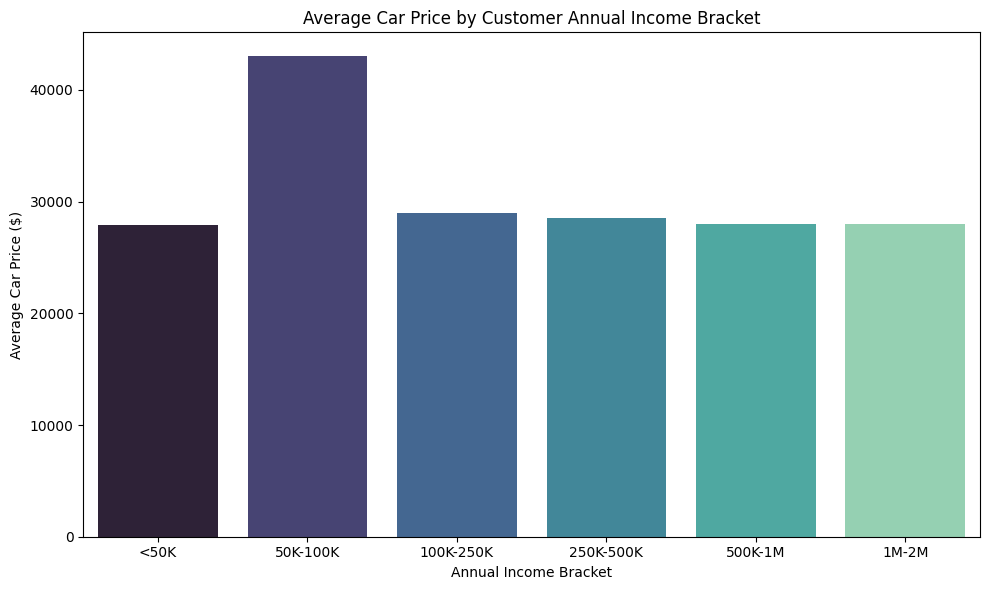

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file (update the path as needed)
df = pd.read_csv("Car Sale.csv")

# Step 1: Create income brackets
income_bins = [0, 50000, 100000, 250000, 500000, 1000000, 2000000]
income_labels = ['<50K', '50K-100K', '100K-250K', '250K-500K', '500K-1M', '1M-2M']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)

# Step 2: Group by income bracket and calculate average price
avg_price_by_income = df.groupby('Income Bracket')['Price ($)'].mean().reset_index()

# Step 3: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Bracket', y='Price ($)', data=avg_price_by_income, palette="mako")
plt.title('Average Car Price by Customer Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Car Price ($)')
plt.tight_layout()
plt.show()


Q 10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?


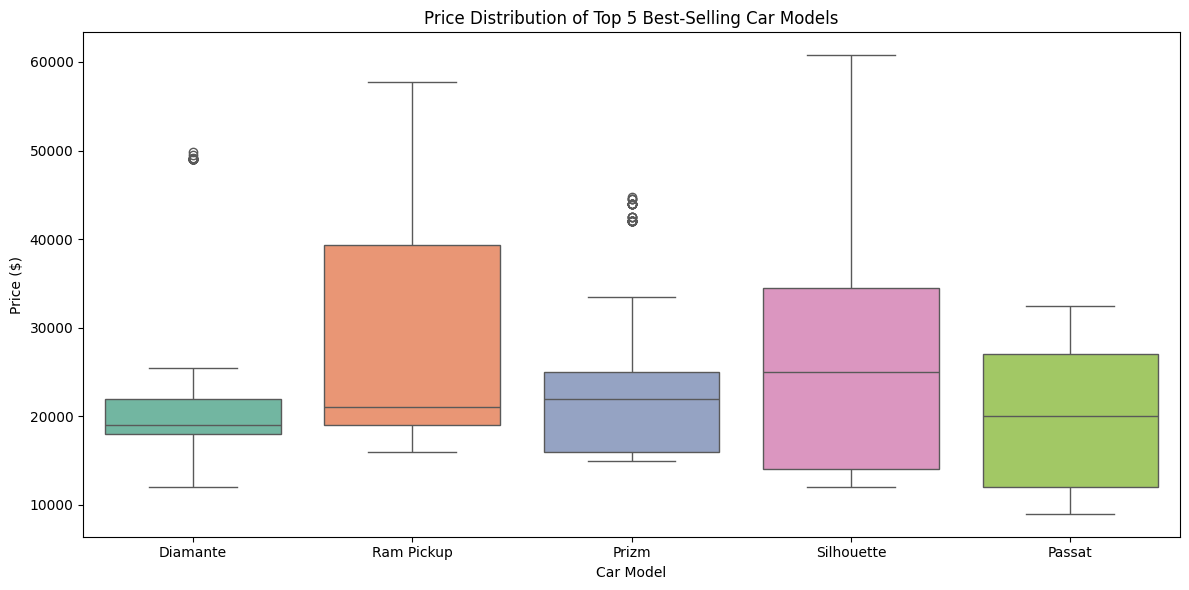

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Car Sale.csv")

# Step 1: Find top 5 best-selling car models
top_models = df['Model'].value_counts().nlargest(5).index.tolist()

# Step 2: Filter data for these top models
top_model_data = df[df['Model'].isin(top_models)]


# Step 3: Plot price distribution for each top model
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_model_data, palette='Set2')
plt.title('Price Distribution of Top 5 Best-Selling Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()

Q 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?


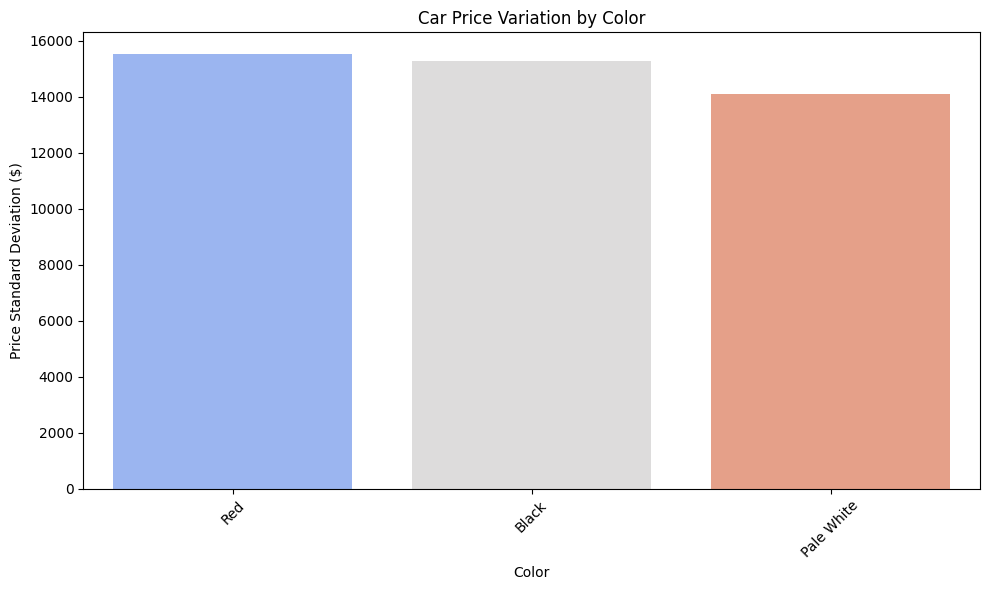

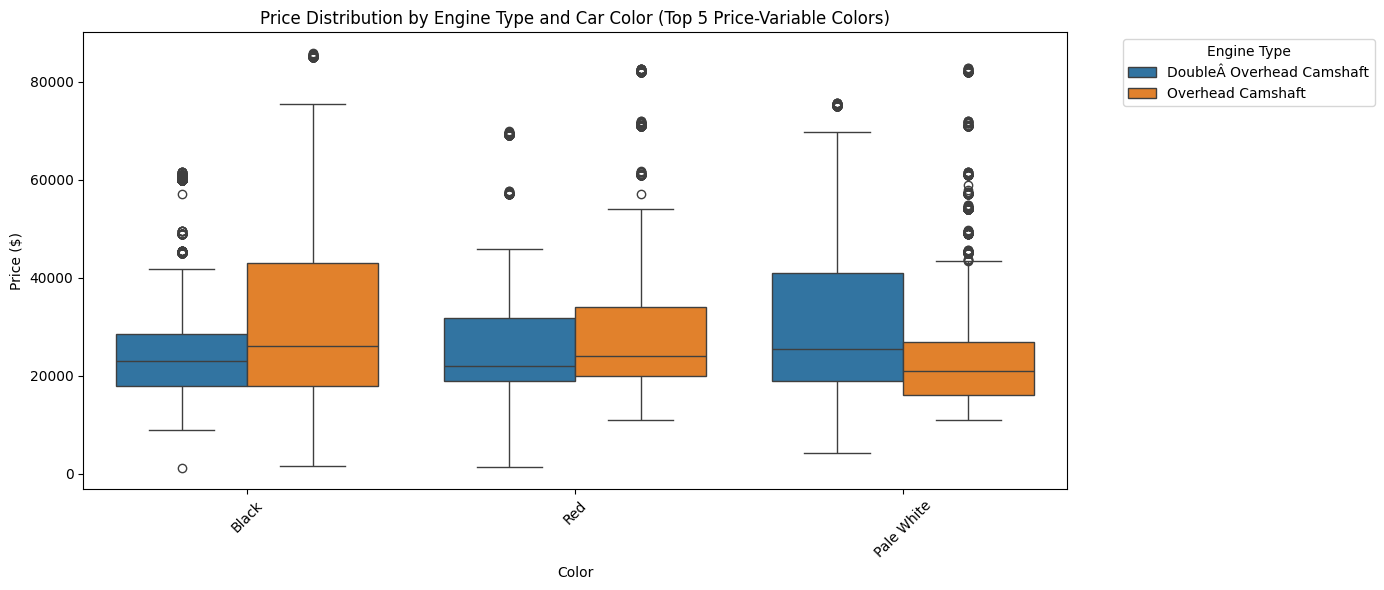

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Car Sale.csv")

# Step 1: Clean engine values (if needed)
df['Engine'] = df['Engine'].str.strip()  # Remove extra spaces

# Step 2: Group by Color and calculate price variation (standard deviation)
color_price_variation = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False).reset_index()
color_price_variation.columns = ['Color', 'Price Std Dev']

# Step 3: Plot price variation by color
plt.figure(figsize=(10, 6))
sns.barplot(data=color_price_variation, x='Color', y='Price Std Dev', palette='coolwarm')
plt.title('Car Price Variation by Color')
plt.xticks(rotation=45)
plt.ylabel('Price Standard Deviation ($)')
plt.tight_layout()
plt.show()

# Step 4: Optional – boxplot of car price by engine & color
top_colors = color_price_variation['Color'].head(5).tolist()
subset = df[df['Color'].isin(top_colors)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=subset, x='Color', y='Price ($)', hue='Engine')
plt.title('Price Distribution by Engine Type and Car Color (Top 5 Price-Variable Colors)')
plt.xticks(rotation=45)
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Q 12. Is there any seasonal trend in car sales based on the date of sale?


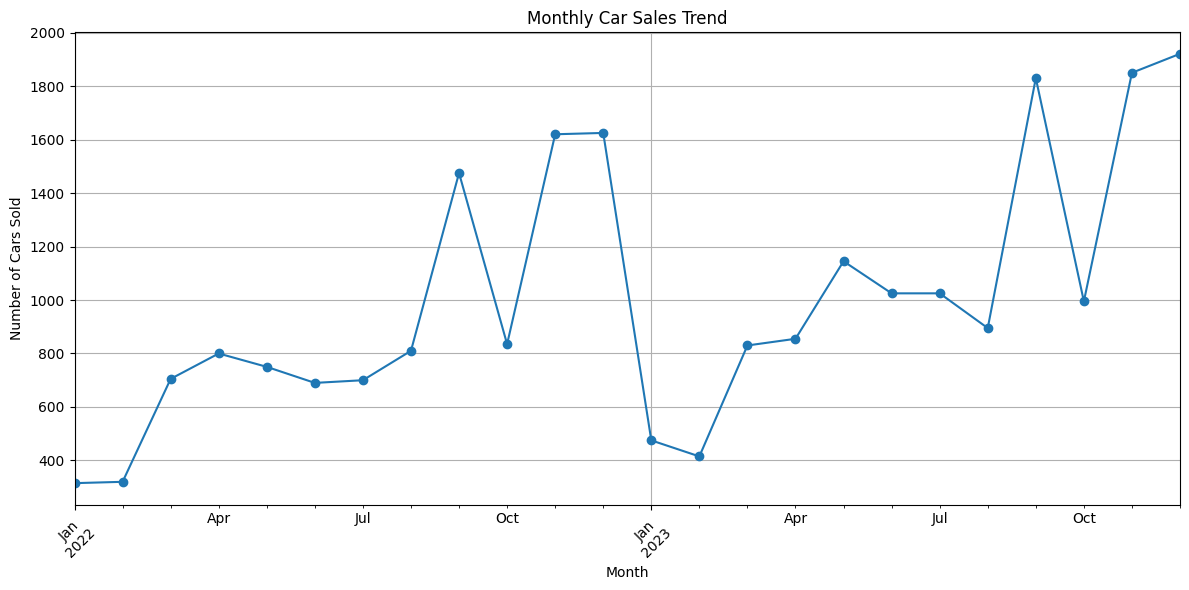

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group by month and count sales
monthly_sales = df.groupby('YearMonth').size()

# Plotting the trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Q 13.How does the car price distribution change when considering different combinations of body style and transmission type?


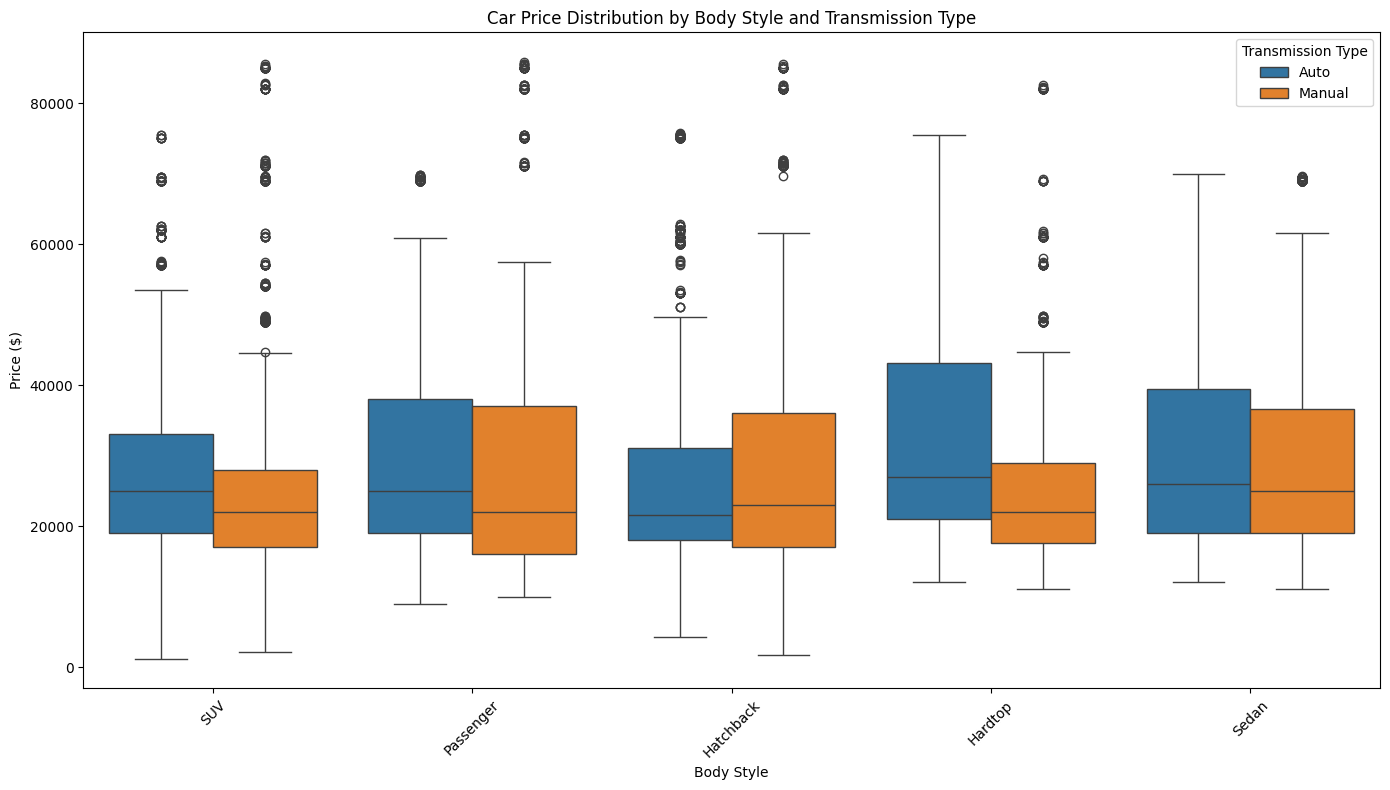

In [ ]:
import seaborn as sns

# Clean column names (remove trailing whitespace)
df.columns = df.columns.str.strip()

# Plot a boxplot to show price distribution by Body Style and Transmission
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Transmission Type')
plt.tight_layout()
plt.show()


Q 14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?


In [ ]:
import re

# Function to extract engine size (in liters, assumed) from text
def extract_engine_size(engine_text):
    if isinstance(engine_text, str):
        match = re.search(r'(\d+\.\d+|\d+)[Ll]?', engine_text)
        if match:
            return float(match.group(1))
    return None

# Apply the extraction
df['Engine_Size'] = df['Engine'].apply(extract_engine_size)

# Select relevant columns
correlation_df = df[['Price ($)', 'Annual Income', 'Engine_Size']].dropna()

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

correlation_matrix


,Price ($),Annual Income,Engine_Size
Price ($),NaN,NaN,NaN
Annual Income,NaN,NaN,NaN
Engine_Size,NaN,NaN,NaN


Q 15.How does the average car price vary across different car models and engine types?

In [ ]:
# Group by Model and Engine, then calculate average price
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Sort by average price descending
avg_price_by_model_engine_sorted = avg_price_by_model_engine.sort_values(by='Price ($)', ascending=False)

# Display top 10 combinations
avg_price_by_model_engine_sorted.head(10)


,Model,Engine,Price ($)
212,SC,Overhead Camshaft,61074.818182
198,Ranger,DoubleÂ Overhead Camshaft,61064.055556
222,Sable,Overhead Camshaft,61039.770833
56,Catera,DoubleÂ Overhead Camshaft,56836.933333
143,LX470,Overhead Camshaft,54037.490196
139,LS400,Overhead Camshaft,53157.941558
111,GS400,Overhead Camshaft,53086.000000
239,Tacoma,DoubleÂ Overhead Camshaft,53085.821918
25,Aurora,Overhead Camshaft,51833.556962
173,Park Avenue,DoubleÂ Overhead Camshaft,49387.750000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('amazon.csv')

1. What is the average rating for each product category?


In [ ]:
# Extract the top-level category (first part before '|')
df['main_category'] = df['category'].str.split('|').str[0]

# Convert the rating column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by main category and calculate average rating
avg_ratings = df.groupby('main_category')['rating'].mean().reset_index()

# Sort by average rating descending
avg_ratings_sorted = avg_ratings.sort_values(by='rating', ascending=False)

avg_ratings_sorted



,main_category,rating
7,OfficeProducts,4.309677
8,Toys&Games,4.300000
5,HomeImprovement,4.250000
1,Computers&Accessories,4.154967
2,Electronics,4.081749
4,Home&Kitchen,4.040716
3,Health&PersonalCare,4.000000
6,MusicalInstruments,3.900000
0,Car&Motorbike,3.800000


 Q 2. What are the top rating count products by category?



In [ ]:
# Clean and convert 'rating_count' column to numeric (remove commas first)
df['rating_count'] = df['rating_count'].str.replace(',', '')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Find the top rating count product in each category
top_rated_by_category = df.loc[df.groupby('main_category')['rating_count'].idxmax()]

# Select relevant columns for display
top_rated_by_category = top_rated_by_category[['main_category', 'product_name', 'rating_count', 'rating']]

top_rated_by_category.sort_values(by='rating_count', ascending=False)


,main_category,product_name,rating_count,rating
12,Electronics,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0,4.4
1028,Home&Kitchen,Pigeon Polypropylene Mini Handy and Compact Ch...,270563.0,4.1
588,Computers&Accessories,SanDisk Cruzer Blade 32GB USB Flash Drive,253105.0,4.3
613,MusicalInstruments,Boya ByM1 Auxiliary Omnidirectional Lavalier C...,68664.0,4.0
924,Toys&Games,Faber-Castell Connector Pen Set - Pack of 25 (...,15867.0,4.3
659,OfficeProducts,Casio FX-82MS 2nd Gen Non-Programmable Scienti...,12179.0,4.4
982,HomeImprovement,"Gizga Essentials Cable Organiser, Cord Managem...",5985.0,4.5
1247,Health&PersonalCare,Dr Trust Electronic Kitchen Digital Scale Weig...,3663.0,4.0
1157,Car&Motorbike,Reffair AX30 [MAX] Portable Air Purifier for C...,1118.0,3.8


3. What is the distribution of discounted prices vs. actual prices?


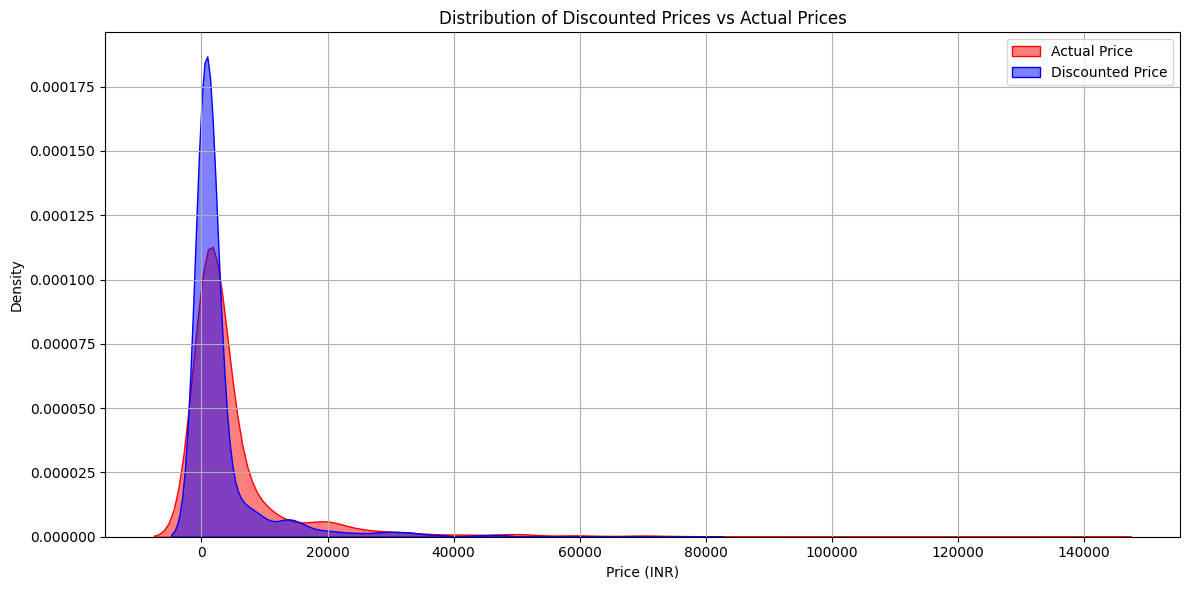

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean 'discounted_price' and 'actual_price' columns (remove ₹ and commas)
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '')
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '')

# Convert to numeric
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Plot distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(df['actual_price'], label='Actual Price', fill=True, color='red', alpha=0.5)
sns.kdeplot(df['discounted_price'], label='Discounted Price', fill=True, color='blue', alpha=0.5)
plt.title('Distribution of Discounted Prices vs Actual Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


4. How does the average discount percentage vary across categories?


In [ ]:
# Re-enable data processing to compute average discount percentage by category

# Remove '%' and convert 'discount_percentage' to numeric
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Group by main_category and calculate average discount
avg_discount_by_category = df.groupby('main_category')['discount_percentage'].mean().reset_index()

# Sort by highest average discount
avg_discount_by_category_sorted = avg_discount_by_category.sort_values(by='discount_percentage', ascending=False)

avg_discount_by_category_sorted


,main_category,discount_percentage
5,HomeImprovement,57.500000
1,Computers&Accessories,54.024283
3,Health&PersonalCare,53.000000
2,Electronics,50.828897
6,MusicalInstruments,46.000000
0,Car&Motorbike,42.000000
4,Home&Kitchen,40.120536
7,OfficeProducts,12.354839
8,Toys&Games,0.000000


5. What are the most popular product names?


In [ ]:
import pandas as pd

# Load your data
df = pd.read_csv("amazon.csv")

# Clean 'rating_count' column (remove commas and convert to numeric)
df['rating_count'] = df['rating_count'].str.replace(',', '')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Get top N most popular products by rating count
top_products = df[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False)

# Display top 10
print(top_products.head(10))


                                          product_name  rating_count
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...      426973.0
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...      426973.0
12   AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0
684  AmazonBasics Flexible Premium HDMI Cable (Blac...      426972.0
400  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
352  boAt Bassheads 100 in Ear Wired Earphones with...      363713.0
584  boAt BassHeads 100 in-Ear Wired Headphones wit...      363711.0
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...      313836.0
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...      313836.0
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...      313832.0


6. What are the most popular product keywords?


In [ ]:
import pandas as pd
from collections import Counter
import re

# Load data
df = pd.read_csv("amazon.csv")

# Clean and convert rating_count to numeric
df['rating_count'] = df['rating_count'].str.replace(',', '')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Filter for top products by rating count (e.g., top 100)
top_products = df.sort_values(by='rating_count', ascending=False).head(100)

# Combine all product names into one large string
text = " ".join(top_products['product_name'].dropna().astype(str))

# Clean and split into words
words = re.findall(r'\b[a-zA-Z]+\b', text.lower())

# Common stopwords to exclude
stopwords = set([
    'with', 'and', 'for', 'in', 'of', 'on', 'by', 'to', 'the', 'a', 'an',
    'from', 'at', 'or', 'is', 'this', 'pack', 'set', 'inch'
])

# Filter words and count
filtered_words = [word for word in words if word not in stopwords]
word_counts = Counter(filtered_words)

# Show top 20 keywords
top_keywords = word_counts.most_common(20)
print(top_keywords)


[('black', 52), ('usb', 35), ('ear', 32), ('mic', 29), ('boat', 25), ('cable', 23), ('wireless', 21), ('wired', 16), ('bluetooth', 16), ('card', 14), ('fast', 14), ('earphones', 13), ('micro', 13), ('charging', 13), ('headphones', 12), ('battery', 12), ('s', 12), ('feet', 11), ('amazonbasics', 11), ('sandisk', 11)]


7. What are the most popular product reviews?


In [ ]:
# Re-import required libraries after code execution environment reset
import pandas as pd



# Count the most frequent product reviews in the dataset
top_reviews = df['product_review'].dropna().astype(str)
most_common_reviews = top_reviews.value_counts().head(10)

# Format and display results
most_common_reviews.reset_index().rename(columns={'index': 'review', 'product_review': 'count'})


NameError: name 'df' is not defined

In [ ]:
# Re-import required libraries after code execution environment reset
import pandas as pd

# Load the data again (or make sure it's in scope)
df = pd.read_csv("amazon.csv")  # Assuming your CSV is named "amazon.csv"

# Count the most frequent product reviews in the dataset
top_reviews = df['product_review'].dropna().astype(str)
most_common_reviews = top_reviews.value_counts().head(10)

# Format and display results
most_common_reviews.reset_index().rename(columns={'index': 'review', 'product_review': 'count'})

KeyError: 'product_review'

8. What is the correlation between discounted_price and rating?


In [ ]:
# First, clean the discounted_price column by removing the currency symbol and converting to float
df['discounted_price_clean'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Convert the rating column to numeric (it might contain non-numeric entries)
df['rating_clean'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate the correlation
correlation = df['discounted_price_clean'].corr(df['rating_clean'])
correlation


np.float64(0.12033741712288548)

9.What are the Top 5 categories based on the highest ratings?

In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("amazon.csv")

# Convert rating to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Some rows may have multiple categories separated by "|", so we'll split them and explode
df['category'] = df['category'].str.split('|')
df_exploded = df.explode('category')

# Group by category and calculate average rating
category_ratings = df_exploded.groupby('category')['rating'].mean().sort_values(ascending=False)

# Get top 5 categories
top_5_categories = category_ratings.head(5)

# Show the results
print(top_5_categories)


category
Tablets             4.6
CoffeePresses       4.5
CordManagement      4.5
Film                4.5
StreamingClients    4.5
Name: rating, dtype: float64


10. Identify any potential areas for improvement or optimization based on the data analysis.

In [ ]:
import pandas as pd
import numpy as np

# ---------- Load and Clean Data ----------
def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)

    # Clean prices
    df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
    df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

    # Convert ratings
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df['rating_count'] = df['rating_count'].str.replace(',', '').astype(str)

    return df

# ---------- Normalize Review Data ----------
def normalize_reviews(df):
    review_cols = ['user_id', 'user_name', 'review_id', 'review_title', 'review_content']
    for col in review_cols:
        df[col] = df[col].str.split(',')
    for col in review_cols:
        df = df.explode(col)
    return df.reset_index(drop=True)

# ---------- Analyze Top Categories ----------
def analyze_top_categories(df, top_n=5):
    df['category'] = df['category'].str.split('|')
    exploded = df.explode('category')
    category_stats = exploded.groupby('category')['rating'].mean().sort_values(ascending=False)
    return category_stats.head(top_n)

# ---------- Main Pipeline ----------
def main():
    df = load_and_clean_data("amazon.csv")
    df_normalized = normalize_reviews(df)

    print("✅ Data cleaned and reviews normalized.")
    print("\n📊 Top 5 Categories by Rating:\n")
    print(analyze_top_categories(df_normalized))

    # Optional: price comparison
    avg_prices = df.groupby('rating').agg({'discounted_price': 'mean', 'actual_price': 'mean'})
    print("\n💰 Avg Prices by Rating:\n")
    print(avg_prices.sort_index(ascending=False).head())

if __name__ == "__main__":
    main()
